In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('/content/placement.csv')

In [6]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [8]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [9]:
df = df.iloc[:,1:]

In [10]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [11]:
import matplotlib.pyplot as plt

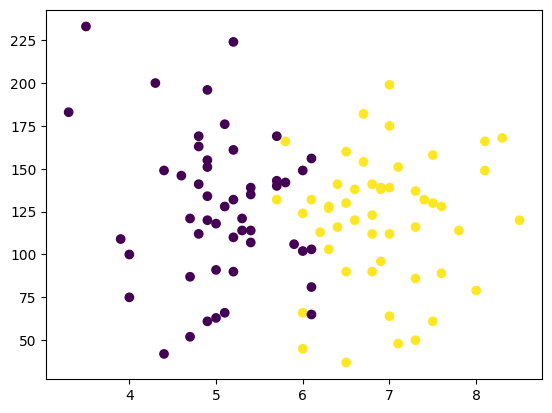

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [16]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [17]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [19]:
X_train

,cgpa,iq
51,4.8,141.0
37,8.1,149.0
96,4.4,42.0
49,5.4,135.0
45,6.0,66.0
...,...,...
65,8.1,166.0
39,4.6,146.0
5,7.1,48.0
36,5.7,140.0


In [20]:
y_train

,placement
51,0
37,1
96,0
49,0
45,1
...,...
65,1
39,0
5,1
36,0


In [21]:
X_test

,cgpa,iq
73,4.9,61.0
48,6.6,138.0
92,5.2,110.0
71,6.1,132.0
55,7.8,114.0
42,7.6,89.0
17,3.3,183.0
38,6.5,160.0
24,4.7,121.0
75,4.8,169.0


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scalar = StandardScaler()

In [25]:
X_train = scalar.fit_transform(X_train)

In [26]:
X_test = scalar.transform(X_test)

In [27]:
X_train

array([[-1.09767854,  0.44487066],
       [ 1.87687005,  0.64394267],
       [-1.45822988, -2.01864554],
       [-0.55685152,  0.29556665],
       [-0.0160245 , -1.42142949],
       [ 0.254389  , -0.50072142],
       [ 0.43466468, -0.82421344],
       [ 1.2459052 ,  0.22091464],
       [-0.28643801,  1.14162271],
       [ 0.88535386, -0.2767654 ],
       [ 0.61494035,  0.76836268],
       [-1.0075407 ,  0.27068264],
       [-0.55685152,  0.39510265],
       [-0.91740286, -0.79932944],
       [ 0.70507818, -0.2767654 ],
       [ 1.15576736,  0.34533465],
       [-0.55685152, -0.2269974 ],
       [ 0.79521602,  0.39510265],
       [-1.45822988,  0.64394267],
       [-0.28643801,  0.49463866],
       [ 0.07411333, -0.50072142],
       [ 0.70507818, -0.00304138],
       [ 0.88535386,  0.39510265],
       [ 0.16425117, -0.2518814 ],
       [ 1.15576736, -0.17722939],
       [ 0.79521602, -0.67490943],
       [ 0.254389  ,  0.12137863],
       [ 0.34452684, -0.17722939],
       [-0.73712719,

In [28]:
X_test

array([[-1.0075407 , -1.5458495 ],
       [ 0.52480251,  0.37021865],
       [-0.73712719, -0.3265334 ],
       [ 0.07411333,  0.22091464],
       [ 1.60645654, -0.2269974 ],
       [ 1.42618087, -0.84909745],
       [-2.44974608,  1.48999874],
       [ 0.43466468,  0.9176667 ],
       [-1.18781637, -0.05280938],
       [-1.09767854,  1.14162271]])

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf = LogisticRegression()

In [31]:
clf.fit(X_train,y_train) #to train the model

LogisticRegression()

In [32]:
clf.predict(X_test)

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [34]:
y_test

,placement
73,0
48,1
92,0
71,1
55,1
42,1
17,0
38,1
24,0
75,0


In [35]:
from sklearn.metrics import accuracy_score

In [37]:
y_pred = clf.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred)

1.0

In [39]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

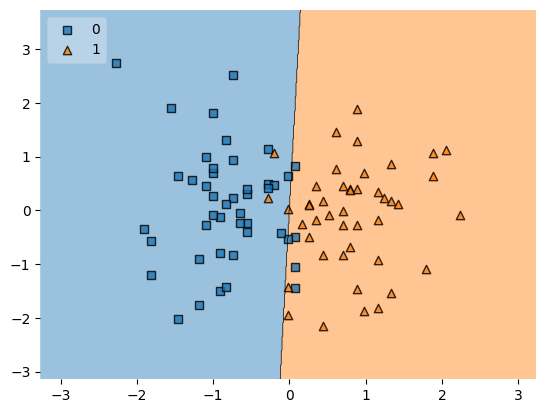

In [40]:
plot_decision_regions(X_train,y_train.values, clf = clf ,legend=2)

In [41]:
import pickle

In [42]:
pickle.dump(clf,open('model.pkl','wb'))